# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [44]:
import pandas as pd

In [45]:
# Your code here.
student_data = pd.DataFrame({'Age': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30],
        'Tardies': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]})

Draw a dispersion diagram (scatter plot) for the data.

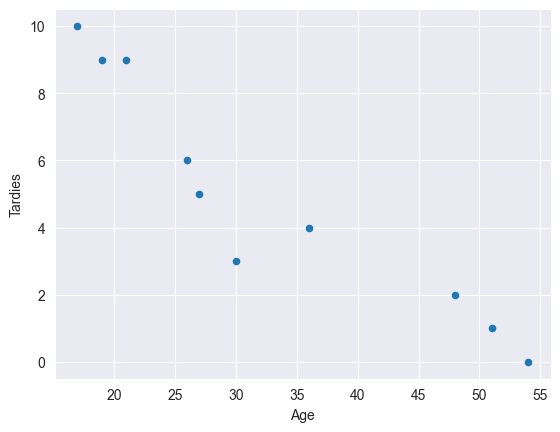

In [46]:
# Your code here.
import matplotlib.pyplot as plt
student_data.plot.scatter(x='Age', y='Tardies')
plt.show()

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [47]:
# Your response here. 
#Older students are less like to be late

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [48]:
# Your response here.
#correlation:
correlation = student_data['Age'].corr(student_data['Tardies'])
print("Correlation:", correlation)

Correlation: -0.9391626886887122


In [49]:
#covariance:
covariance = student_data['Age'].cov(student_data['Tardies'])
print("Covariance:", covariance)

Covariance: -45.56666666666666


In [50]:
#The negative values indicate an inverse relationship between age and tardies, 
#which means that as age increases, tardies tend to decrease. 
#The high absolute value of the correlation coefficient (-0.9392) indicates a strong linear relationship between the two variables, which suggests that age may be a good predictor of tardies in this dataset.

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [51]:
# Your response here.
from sklearn.linear_model import LinearRegression
X = student_data[['Age']]
y = student_data['Tardies']

model = LinearRegression()

model.fit(X, y)

print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Coefficients: [-0.24282077]
Intercept: 12.888803363135768


In [52]:
## we create a LinearRegression object and fit it to the data using model.fit(X, y). Finally, we print the model coefficients, which are the slope (model.coef_) and intercept (model.intercept_) of the linear regression line.
## The outcome variable is the variable we want to predict, which in this case is tardies. The type of regression we're using is simple linear regression, since we only have one predictor variable (age) and one outcome variable (tardies).

Plot your regression model on your scatter plot.

In [53]:
import matplotlib.pyplot as plt


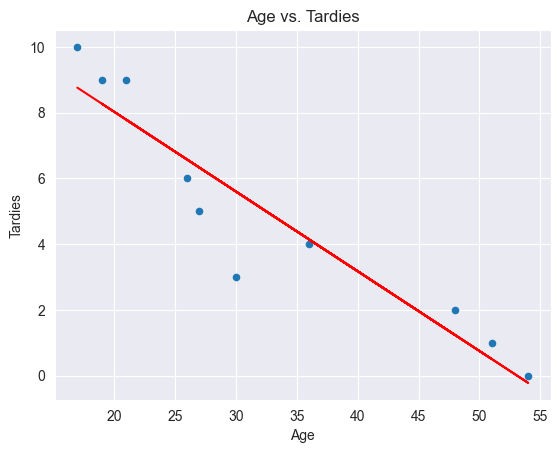

In [54]:
# Your code here.
student_data.plot.scatter(x='Age', y='Tardies')

# Add regression line
plt.plot(X, model.predict(X), color='red')

# Set plot title and axis labels
plt.title('Age vs. Tardies')
plt.xlabel('Age')
plt.ylabel('Tardies')

# Show the plot
plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [55]:
from sklearn.metrics import r2_score

In [56]:
print('Slope:', model.coef_[0])
print('Intercept:', model.intercept_)
print('R-squared:', r2_score(y, model.predict(X)))

Slope: -0.2428207709159808
Intercept: 12.888803363135768
R-squared: 0.8820265558250109


In [57]:
## The regression model shows that as students get older, they tend to be less late to class. This means that age could be a good predictor of tardiness. However, the model was only based on a small group of 10 students, so we can't be sure if this relationship applies to all students. The R-squared value of 0.882 indicates that the model fits the data well, but we should be cautious about generalizing the results.

In [58]:
#Overall, we can say that age is a potentially good predictor of tardiness based on this model, but more research with a larger sample size would be needed to confirm this relationship.

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [59]:
# Import any libraries you may need & the data
import pandas as pd
import numpy as np

vehicles = pd.read_csv("vehicles.csv")

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [60]:
# Your response here. 
correlations = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']].corr()

print(correlations)

                             Year  Cylinders  Fuel Barrels/Year  Combined MPG  \
Year                     1.000000   0.082469          -0.221084      0.204751   
Cylinders                0.082469   1.000000           0.739517     -0.698648   
Fuel Barrels/Year       -0.221084   0.739517           1.000000     -0.909743   
Combined MPG             0.204751  -0.698648          -0.909743      1.000000   
Fuel Cost/Year          -0.091913   0.778153           0.916208     -0.875185   
CO2 Emission Grams/Mile -0.222300   0.752393           0.986189     -0.926229   

                         Fuel Cost/Year  CO2 Emission Grams/Mile  
Year                          -0.091913                -0.222300  
Cylinders                      0.778153                 0.752393  
Fuel Barrels/Year              0.916208                 0.986189  
Combined MPG                  -0.875185                -0.926229  
Fuel Cost/Year                 1.000000                 0.930865  
CO2 Emission Grams/Mile       

In [61]:
#variable with the highest correlation coefficient with CO2 Emission Grams/Mile is Fuel Barrels/Year (0.986189), followed by Cylinders (0.752393).

In [62]:
#, the variable with the least amount of helpful information for determining CO2 emissions is Year (-0.222300). Its correlation coefficient is negative and relatively weak

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [63]:
# Your response here. 
from sklearn import linear_model
model = linear_model.LinearRegression()

X = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]  
Y = vehicles['CO2 Emission Grams/Mile']

lreg = model.fit(X,Y)
lreg.score(X,Y)

0.9808734920269122

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [64]:
# Your response here. 
print(lreg.intercept_)  
print(lreg.coef_) 

769.8882836465227
[-0.32061673  1.87879976 19.05292507 -3.04039938  0.03230948]


## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [65]:
# Your code here.
data = {'X': [1, 3, 4, 6, 8, 9, 11, 14],
        'Y': [1, 2, 4, 4, 5, 7, 8, 13]}

df = pd.DataFrame(data)

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [66]:
import seaborn as sns

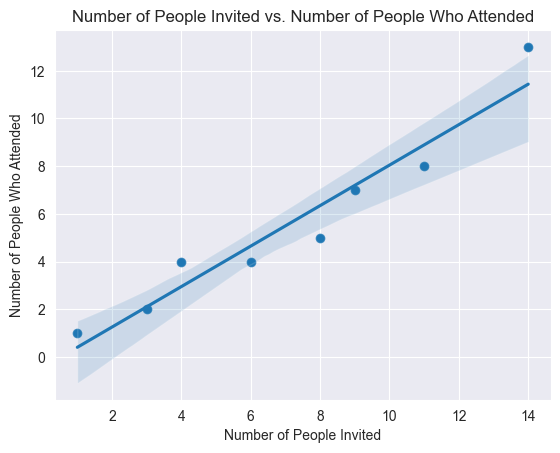

In [67]:
# Your code here.
sns.set_style("darkgrid")

# Draw the scatter plot
sns.scatterplot(x='X', y='Y', data=df)

# Fit a linear regression line
sns.regplot(x='X', y='Y', data=df)

# Set the plot title and axes labels
plt.title("Number of People Invited vs. Number of People Who Attended")
plt.xlabel("Number of People Invited")
plt.ylabel("Number of People Who Attended")

# Show the plot
plt.show()

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [68]:
import statsmodels.api as sm

X = sm.add_constant(df['X'])

model = sm.OLS(df['Y'], X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     81.81
Date:                Mon, 13 Mar 2023   Prob (F-statistic):           0.000102
Time:                        16:39:52   Log-Likelihood:                -10.800
No. Observations:                   8   AIC:                             25.60
Df Residuals:                       6   BIC:                             25.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4394      0.759     -0.579      0.5

c:\Users\jmpcs\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [69]:
# Your response here. 
# we can see that there is a positive linear relationship between the number of people invited and the number of people who attended the party. Therefore, it is appropriate to model this relationship with a linear regression.

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [70]:
# Your response here. 
# we can see that there is one point with a lower number of invited people (X=1) and a lower number of attendees (Y=1) compared to the other points, which could be considered an outlier. Let's remove this point and recalculate the regression:

df2 = df[df['X'] != 1]

# Create the linear regression model
model2 = sm.OLS(df2['Y'], sm.add_constant(df2['X'])).fit()

# Print the regression results
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     56.70
Date:                Mon, 13 Mar 2023   Prob (F-statistic):           0.000654
Time:                        16:39:53   Log-Likelihood:                -9.6134
No. Observations:                   7   AIC:                             23.23
Df Residuals:                       5   BIC:                             23.12
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8742      1.025     -0.853      0.4

c:\Users\jmpcs\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


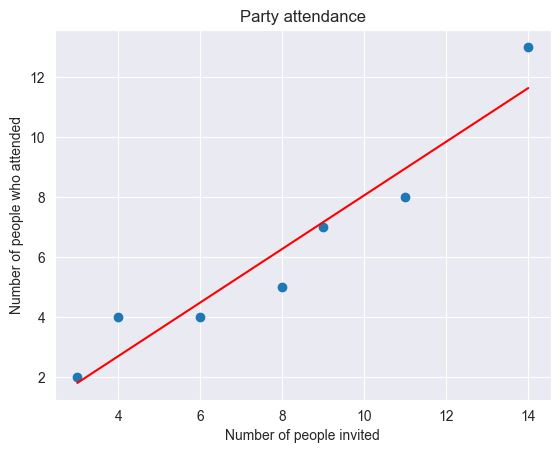

In [71]:
import matplotlib.pyplot as plt

# Plot the scatter plot
plt.scatter(df2['X'], df2['Y'])

# Plot the regression line
plt.plot(df2['X'], model2.predict(), color='red')

# Set the axis labels and title
plt.xlabel('Number of people invited')
plt.ylabel('Number of people who attended')
plt.title('Party attendance')

# Show the plot
plt.show()

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [72]:
# Your response here. 
#When we removed the outlier point, the regression line changed a little but the overall relationship between the number of people invited and the number of people attending the party remained strong. The scatter plot with the new model looked similar to the original plot, just without the outlier. The form of the data is still linear, which means that the relationship between the number of people invited and the number of people attending the party can be described by a straight line. However, we need to be careful when removing data points and consider why the outlier was there in the first place.